In [1]:
from gvxrPython3 import gvxr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table
from skimage.feature import canny

In [2]:
gvxr.clearDetectorEnergyResponse()
gvxr.createOpenGLContext()
gvxr.setSourcePosition(0., -1000., 0., "mm")
gvxr.usePointSource()
gvxr.addFilter("Al", 1., "mm")
gvxr.addFilter("Cu", 0.1, "mm")

gvxr.setMonoChromatic(80., "keV", 1000)
gvxr.setDetectorPosition(0., -100., 0., "mm")
gvxr.setDetectorUpVector(0, 0, -1)
gvxr.setDetectorNumberOfPixels(1000, 1000)
gvxr.setDetectorPixelSize(0.3048, 0.3048, "mm")
gvxr.setScintillator("CsI", 600, "um")

In [3]:
gvxr.loadMeshFile("panev", "stlSim\panevModel.stl", "mm")
gvxr.moveToCentre("panev")

In [4]:
gvxr.setMixture("panev", [1, 6, 7, 8, 11, 12, 15, 16, 20], 
                [0.034, 0.155, 0.042, 0.435, 0.001, 0.002, 0.103, 0.003, 0.225])
gvxr.setDensity("panev", 1.920, "g/cm3")

In [5]:
xrayImage = np.array(gvxr.computeXRayImage()).astype(np.float32)

In [6]:
totalEnergyInMeV = gvxr.getTotalEnergyWithDetectorResponse()
white = np.ones(xrayImage.shape) * totalEnergyInMeV
dark = np.zeros(xrayImage.shape)

xrayImageFlat = (xrayImage - dark) / (white - dark)

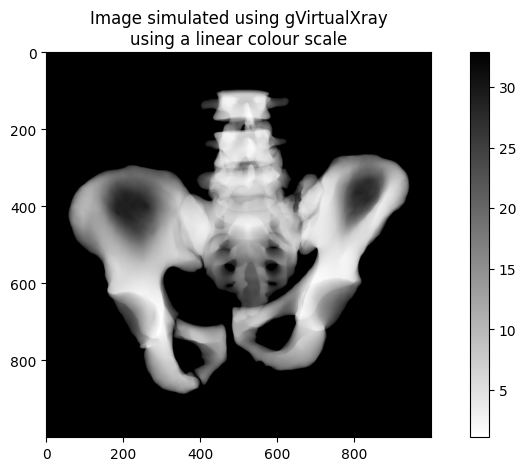

In [13]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a linear colour scale")
plt.imshow(xrayImage, cmap="gray_r")
plt.colorbar(orientation='vertical')
plt.show()

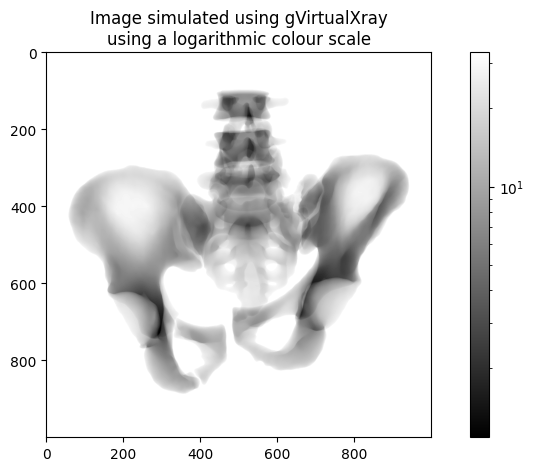

In [8]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a logarithmic colour scale")
plt.imshow(xrayImage, cmap="gray", norm=LogNorm(vmin=xrayImage.min(), vmax=xrayImage.max()))
plt.colorbar(orientation='vertical')
plt.show()

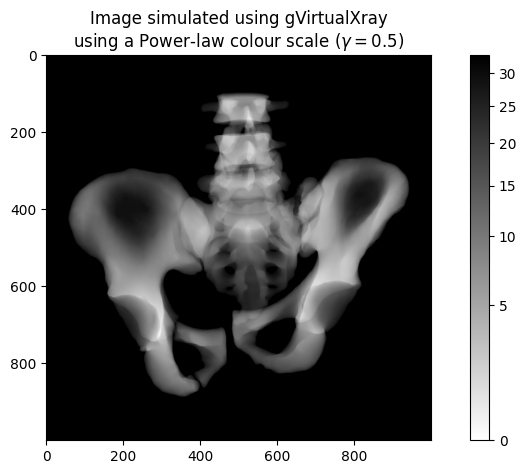

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a Power-law colour scale ($\gamma=0.5$)")
plt.imshow(xrayImage, cmap="gray_r", norm=PowerNorm(gamma=1./2.))
plt.colorbar(orientation='vertical')
plt.show()

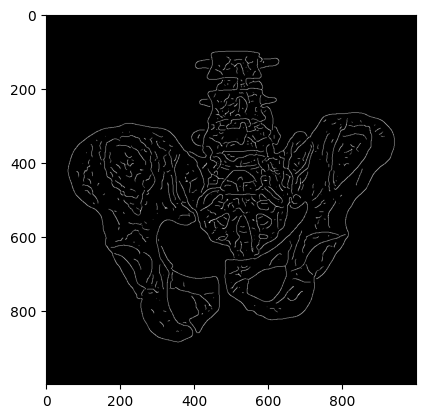

In [15]:
xrayImageEdges = canny(xrayImage, sigma=3)
plt.imshow(xrayImageEdges, cmap="gray")

In [11]:
import SimpleITK as sitk

In [16]:
sitkImage = sitk.GetImageFromArray(xrayImage)

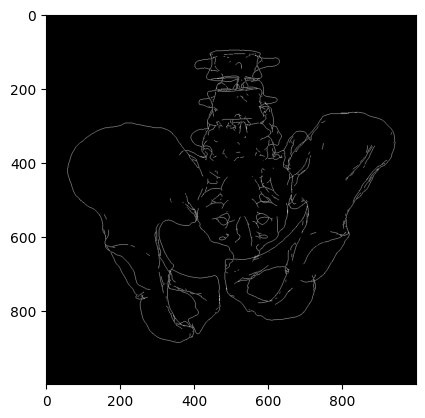

In [58]:
sitkImageEdges = sitk.CannyEdgeDetection(sitkImage, lowerThreshold=0.9, upperThreshold=1)
plt.imshow(sitk.GetArrayViewFromImage(sitkImageEdges), cmap="gray")

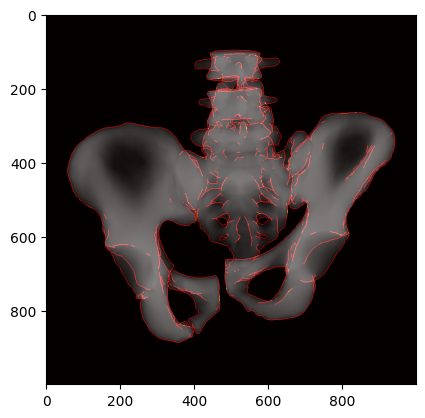

In [59]:
plt.imshow(xrayImage, cmap="gray_r")
plt.imshow(sitk.GetArrayViewFromImage(sitkImageEdges), cmap="hot", alpha=0.5)